Draw a surface plot of power-law where the independent parameters are alpha and beta, and data size (m) is fixed. This might be somehow similar to the error surfaces in the NPTEL course. Draw this surface of various values of m, and then draw contour or trajectory line for specific alpha and beta and growing m. Creating a web application might be nice where you can query a learning curve for given alpha and beta.

In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import sys
from pathlib import Path
from glob import glob

import sklearn
import numpy as np
import pandas as pd
from glob import glob

from keras.models import load_model

import matplotlib
import matplotlib.pyplot as plt

fontsize = 13

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# Make all python scripts available in the path
import sys
sys.path.append('../')

In [19]:
import lrn_crv
import lrn_crv_plot

In [20]:
filepath = Path(os.getcwd())
filepath

PosixPath('/vol/ml/apartin/projects/LearningCurves/notebooks')

In [21]:
def pwr_law(m, a, b, c):
    return a * np.power(m, b) + c

In [107]:
# m = np.linspace()
m = np.logspace(1, 30, num=20, base=2)
m[:7]

array([   2.        ,    5.76098615,   16.59448071,   47.80028677,
        137.68839504,  396.61046842, 1142.43370779])

In [108]:
# prms1 = {'a': 20, 'b': -0.3, 'c': 0.5}
# prms2 = {'a': 40, 'b': -0.3, 'c': 0.5}
# prms3 = {'a': 60, 'b': -0.3, 'c': 0.5}

# prms1 = {'a': 40, 'b': -0.3, 'c': 0.5}
# prms2 = {'a': 40, 'b': -0.6, 'c': 0.5}

# prms1 = {'a': 40, 'b': -0.3, 'c': 0.3}
# prms2 = {'a': 40, 'b': -0.3, 'c': 0.7}

# prms1 = {'a': 20, 'b': -0.5, 'c': 0.06}  # lgb
# prms2 = {'a': 40, 'b': -0.5, 'c': 0.05} # nn

# somewhat works!
# prms1 = {'a': 40, 'b': -0.5, 'c': 0}  # lgb
# prms2 = {'a': 100, 'b': -0.5, 'c': 0.3} # nn

# somewhat works!
# prms1 = {'a': 40, 'b': -0.5, 'c': 0.5}  # lgb
# prms2 = {'a': 100, 'b': -0.5, 'c': 0.3} # nn

# Empirical
# prms1 = {'a': 0.154643201156493,   'b': -0.19361366409318226, 'c': 0.036497614590607026} # lgb 100 trees
# prms2 = {'a': 0.15808120251500138, 'b': -0.12598751726065188, 'c': 0.011060903095983206} # lgb 1000 trees
# prms1 = {'a': 0.154643201156493,   'b': -0.19, 'c': 0} # 
# prms2 = {'a': 0.15808120251500138, 'b': -0.12, 'c': 0} # 

# Empirical (old run)
# prms1 = {'a': 0.154643201156493,   'b': -0.19361366409318226, 'c': 0.036497614590607026} # lgb 100 trees
# prms2 = {'a': 0.15808120251500138, 'b': -0.12598751726065188, 'c': 0.011060903095983206} # lgb 1000 trees

# Important!
# It is interesting to notice that we extend the fit, both networks exhibit similar convergence point
# We should try: fit using smaller dataset size, and see if we correctly predict the curve! This will make this tool stronger!
# prms1 = {'a': 3.973741686896933,  'b': -0.6559490671827385, 'c': 0.07040232910681914} # , 'label': 'LGBM Reg'}
# prms2 = {'a': 1.4911935259671287, 'b': -0.3807094206959989, 'c': 0.05639455597713077} # , 'label': 'NN model0'}
# prms3 = {'a': 40.75465393519189,  'b': -0.6790245670555618, 'c': 0.05864712951655012} # , 'label': 'NN model1'}


# y1[:5]

In [117]:
# prms1 = {'a': 1.5, 'b': -0.55, 'c': 0.05}
# prms2 = {'a': 0.5, 'b': -0.35, 'c': 0.05}
# prms3 = {'a': 0.5, 'b': -0.55, 'c': 0.05}

# prms1 = {'a': 1.5, 'b': -0.55, 'c': 0.05}
# prms2 = {'a': 1.5, 'b': -0.35, 'c': 0.05}
# prms3 = {'a': 1.5, 'b': -0.55, 'c': 0}

prms1 = {'a': 1.1706583311698973, 'b': -0.5569621779568061, 'c': 0.01}
prms2 = {'a': 1.1706583311698973, 'b': -0.2957257584390054, 'c': 0.01}
prms3 = {'a': 0.4461063582964614, 'b': -0.5569621779568061, 'c': 0.01}
prms4 = {'a': 0.4461063582964614, 'b': -0.2957257584390054, 'c': 0.01}

In [118]:
y1 = pwr_law(m=m, **prms1)
y2 = pwr_law(m=m, **prms2)
y3 = pwr_law(m=m, **prms3)
y4 = pwr_law(m=m, **prms4)

In [119]:
xtick_scale = 'log2'; ytick_scale = 'log2'
# xtick_scale = 'log10'; ytick_scale = 'log10'

basex, xlabel_scale = lrn_crv_plot.scale_ticks_params(tick_scale=xtick_scale)
basey, ylabel_scale = lrn_crv_plot.scale_ticks_params(tick_scale=ytick_scale)

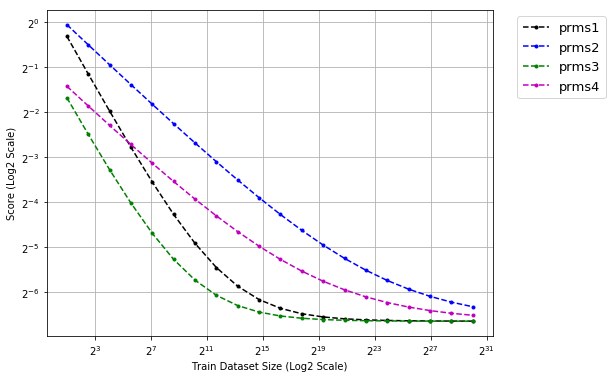

In [120]:
_, ax = plt.subplots(figsize=(8,6))
ax.plot(m, y1, '.--', label='prms1', color='k')
ax.plot(m, y2, '.--', label='prms2', color='b')
ax.plot(m, y3, '.--', label='prms3', color='g')
ax.plot(m, y4, '.--', label='prms4', color='m')

ax.set_xlabel(f'Train Dataset Size ({xlabel_scale})');
if 'log' in xlabel_scale.lower(): ax.set_xscale('log', basex=basex)
ax.set_ylabel(f'Score ({ylabel_scale})');
if 'log' in ylabel_scale.lower(): ax.set_yscale('log', basey=basey)
ax.legend(frameon=True, fontsize=fontsize, bbox_to_anchor=(1.04, 1), loc='upper left'); ax.grid(True)

In [ ]:
xtick_scale = 'linear'
ytick_scale = 'linear'

# Set axes scale and labels
basex, xlabel_scale = lrn_crv_plot.scale_ticks_params(tick_scale=xtick_scale)
basey, ylabel_scale = lrn_crv_plot.scale_ticks_params(tick_scale=ytick_scale)

In [ ]:
# _, ax = plt.subplots(figsize=(8,6))
# ax.plot(m, y1, label='prms1')
# ax.plot(m, y2, label='prms2')
# ax.plot(m, y3, label='prms3')

# ax.set_xlabel(f'Train Dataset Size ({xlabel_scale})')
# if 'log' in xlabel_scale.lower(): ax.set_xscale('log', basex=basex)
# ax.set_ylabel(f'Score ({ylabel_scale})')
# if 'log' in ylabel_scale.lower(): ax.set_yscale('log', basey=basey)
    
# ax.legend(frameon=True, fontsize=fontsize, bbox_to_anchor=(1.04, 1), loc='upper left')    
# ax.grid(True)